In [26]:
from sklearn.datasets import make_regression
import seaborn as sns
import matplotlib.pylab as plt
import statsmodels.api as sm

In [5]:
X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

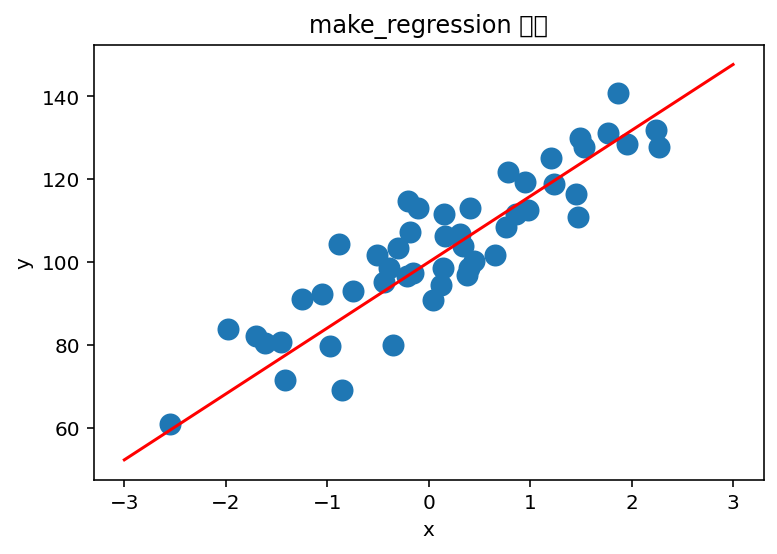

In [6]:
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

array(15.89695836)

In [21]:
def make_regression2(n_samples, bias, noise, random_state):
    np.random.seed(random_state)
    X = np.random.normal(size=n_samples)
    w = 100 * np.random.normal(size=1)[0]
    y0 = w*X + bias
    e = np.random.normal(scale=noise, size=n_samples)
    y = y0 + e
    return X, y, w

In [22]:
X, y, w = make_regression2(n_samples=50, bias=100, noise=10, random_state=0)

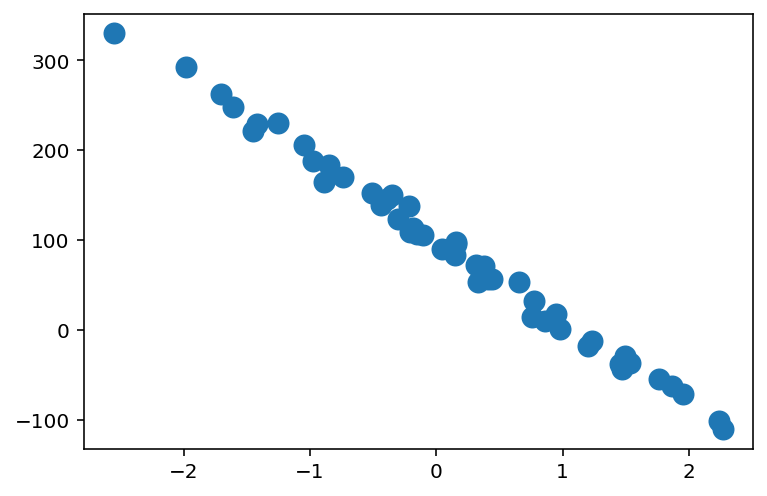

In [23]:
plt.scatter(X, y, s=100)
plt.show()

In [24]:
from sklearn.datasets import make_regression

In [27]:
bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [28]:
w = np.linalg.inv(X.T@X) @ X.T @ y

In [29]:
w

array([[99.79150869],
       [86.96171201]])

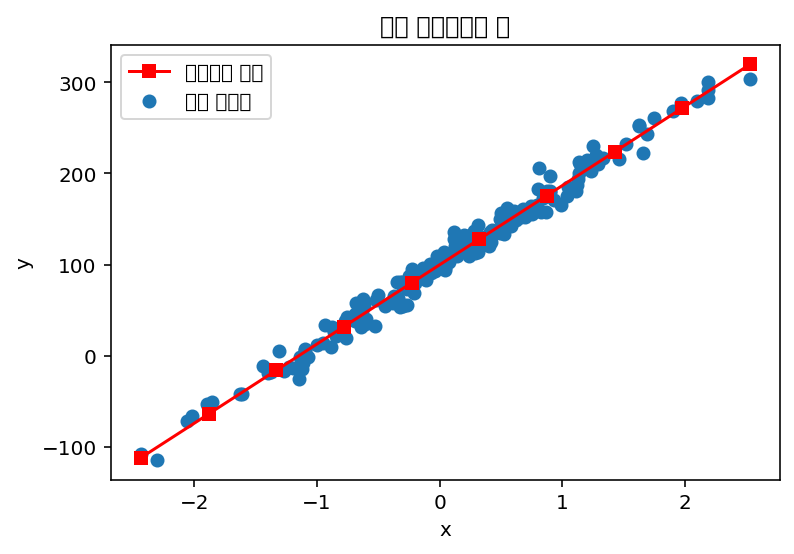

In [30]:
x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new)  # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")
plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X0, y)
print(model.intercept_, model.coef_)

[99.79150869] [[86.96171201]]


In [36]:
df = pd.DataFrame({"x": X0[:, 0], "y":y[:,0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [37]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()

In [38]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          8.17e-182
Time:                        13:02:05   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.7915      0.705    141.592      0.0

In [39]:
result.predict({"x": [-2, -1, 0, 1, 2] })

0    -74.131915
1     12.829797
2     99.791509
3    186.753221
4    273.714933
dtype: float64

In [40]:
result.params

Intercept    99.791509
x            86.961712
dtype: float64

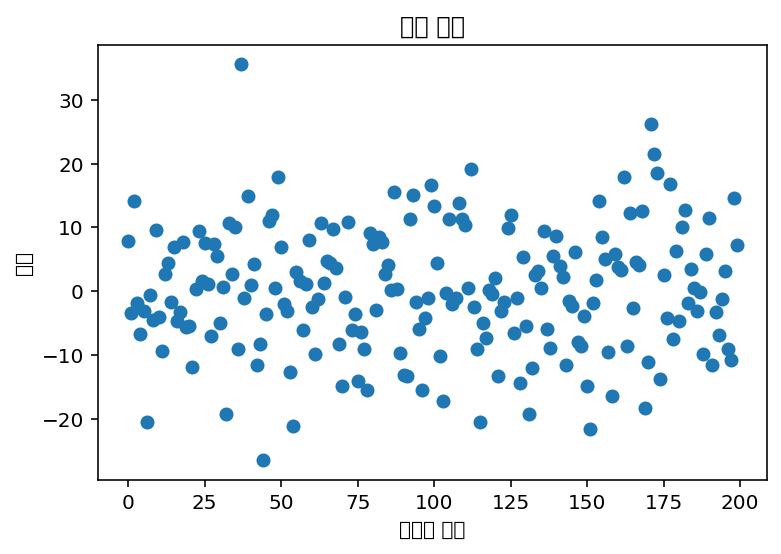

In [41]:
result.resid.plot(style="o")
plt.title("잔차 벡터")
plt.xlabel("데이터 번호")
plt.ylabel("잔차")
plt.show()

In [52]:
from sklearn.datasets import load_boston

boston = load_boston()


In [42]:

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          6.72e-135
Time:                        13:06:19   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [56]:
dfX

,const,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,1.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,1.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,1.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,1.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,1.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,1.0,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,1.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [51]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

dfX0 = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(diabetes.target, columns=["target"])

model_diabetes2 = sm.OLS(dfy, dfX)
result_diabetes2 = model_diabetes2.fit()
print(result_diabetes2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           3.83e-62
Time:                        13:13:51   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0